In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [3]:
data = pd.read_csv('../day10/data/equipment_anomaly_data.csv')
data.head(10)

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0
5,49.510959,76.426729,4.809298,20.269692,Compressor,New York,1.0
6,66.903503,45.530759,1.548345,64.804922,Compressor,Houston,0.0
7,148.923369,22.214121,0.109819,39.944953,Turbine,San Francisco,1.0
8,50.403299,45.399899,2.231718,43.067667,Pump,Houston,0.0
9,63.886148,33.802912,1.139280,41.795515,Compressor,Atlanta,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


In [12]:
turbine_data = data[data['equipment']=='Turbine']
turbine_data.head(10)

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
7,148.923369,22.214121,0.109819,39.944953,Turbine,San Francisco,1.0
13,84.711703,44.084965,1.359403,47.560971,Turbine,San Francisco,0.0
14,83.736585,53.447573,1.643008,25.525049,Turbine,New York,0.0
18,68.372071,21.394982,1.224774,47.377719,Turbine,Atlanta,0.0
20,60.574420,29.878828,0.984001,44.627110,Turbine,Chicago,0.0
24,67.819541,40.370161,2.460619,64.314530,Turbine,Houston,0.0
31,44.460789,26.551107,1.329240,58.638421,Turbine,San Francisco,0.0
32,73.740566,38.487581,1.255600,44.206425,Turbine,Houston,0.0


In [13]:
pump_data = data[data['equipment']=='Pump']
pump_data.head(10)

,temperature,pressure,vibration,humidity,equipment,location,faulty
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0
8,50.403299,45.399899,2.231718,43.067667,Pump,Houston,0.0
11,141.260310,54.239058,2.725691,86.390466,Pump,Atlanta,1.0
17,57.903053,30.368126,1.652980,48.857561,Pump,Chicago,0.0
21,67.288764,42.908870,0.892078,48.503246,Pump,Atlanta,0.0
23,88.338965,39.496738,1.273058,46.452482,Pump,Houston,0.0
25,117.255657,76.174692,3.255743,82.143058,Pump,New York,1.0
26,54.806539,36.815456,0.900819,43.231893,Pump,New York,0.0
27,58.003025,22.771270,1.730394,46.080521,Pump,San Francisco,0.0


In [14]:
compressor_data=  data[data['equipment']=='Compressor']
compressor_data.head(10)

,temperature,pressure,vibration,humidity,equipment,location,faulty
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
5,49.510959,76.426729,4.809298,20.269692,Compressor,New York,1.0
6,66.903503,45.530759,1.548345,64.804922,Compressor,Houston,0.0
9,63.886148,33.802912,1.139280,41.795515,Compressor,Atlanta,0.0
10,53.070432,44.105203,2.071652,47.458742,Compressor,New York,0.0
12,68.491623,45.438678,1.195049,59.989678,Compressor,Houston,0.0
15,81.663705,21.754885,1.202416,47.006730,Compressor,Atlanta,0.0
16,67.419915,31.181241,1.469402,40.993603,Compressor,New York,0.0
19,74.070523,48.903880,0.923370,50.287287,Compressor,Atlanta,0.0
22,73.376027,24.216034,0.865038,59.741185,Compressor,Chicago,0.0


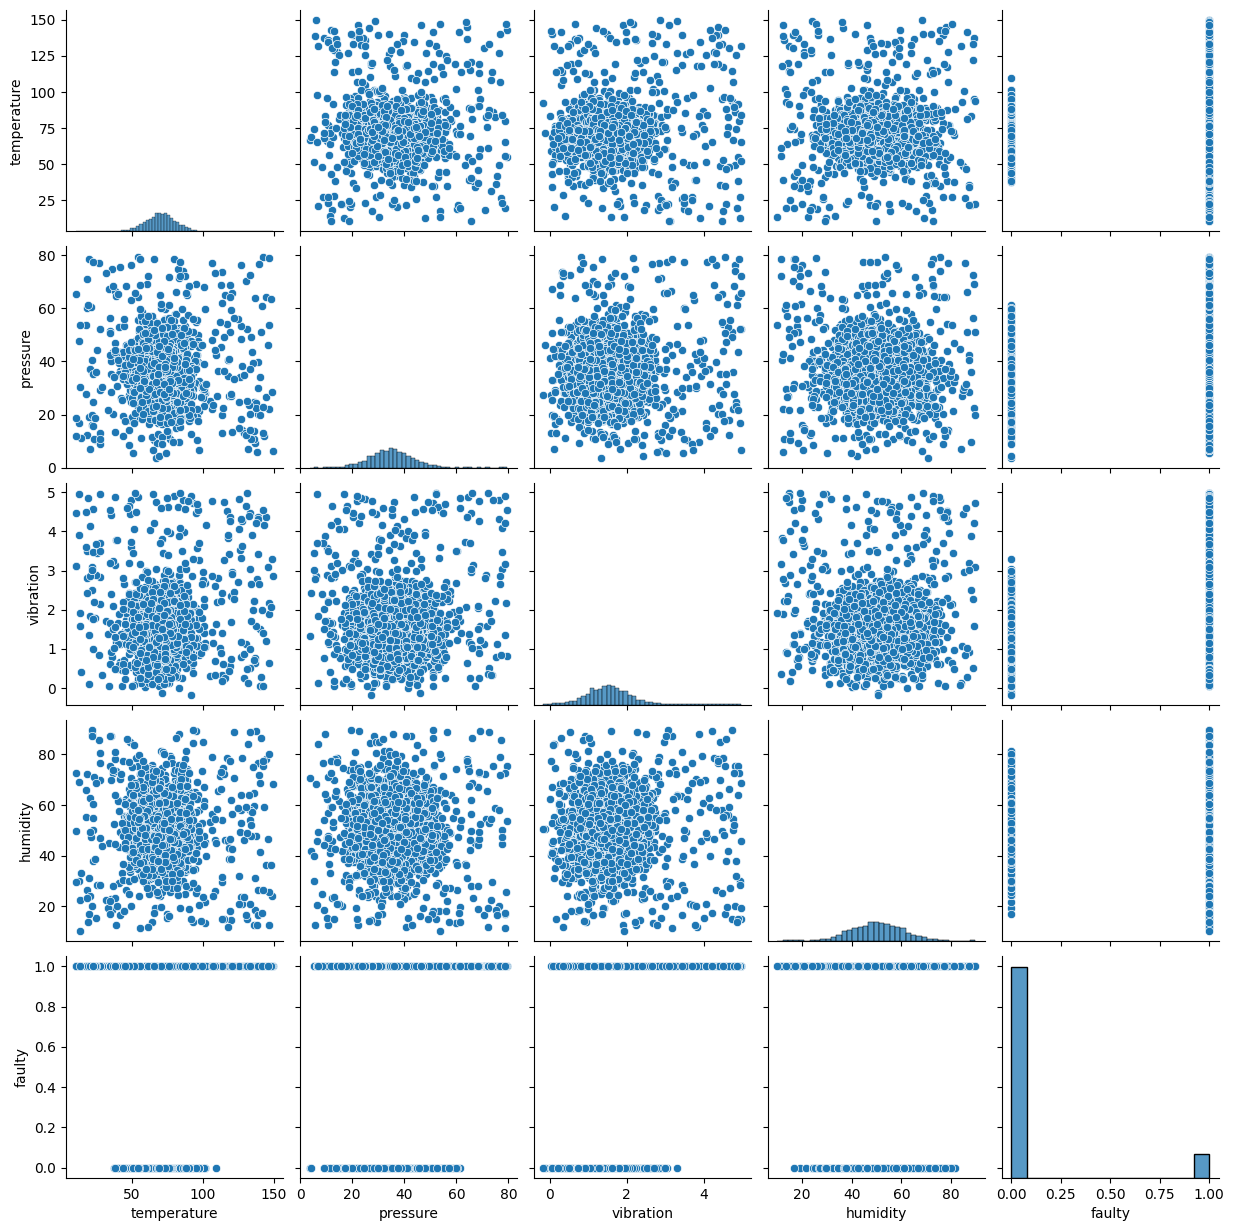

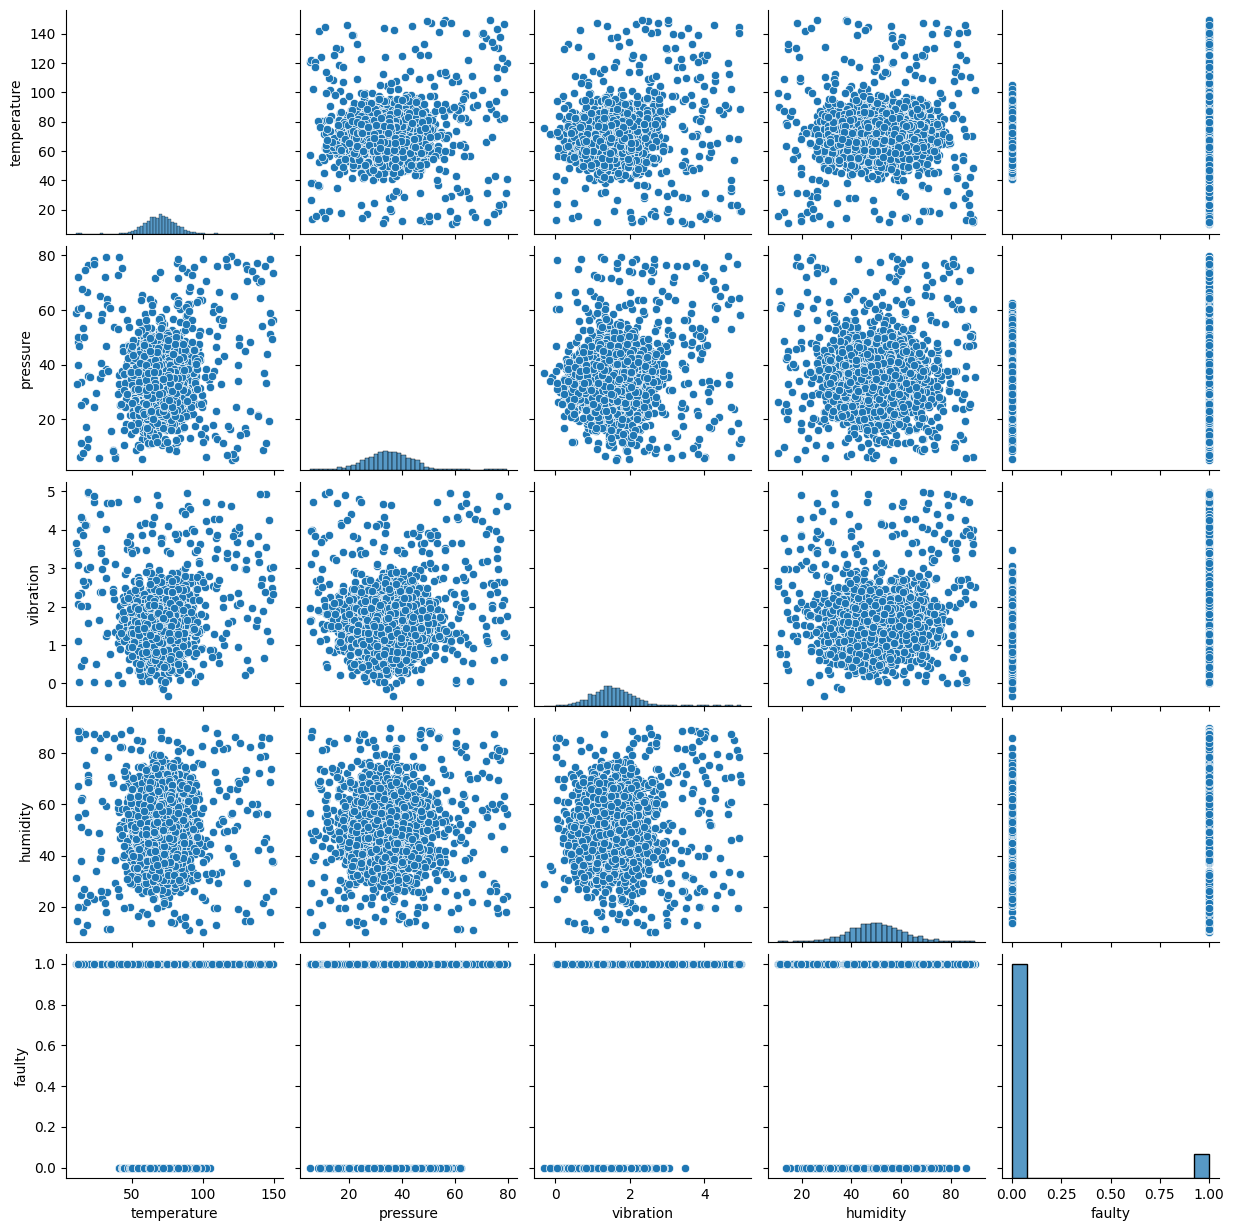

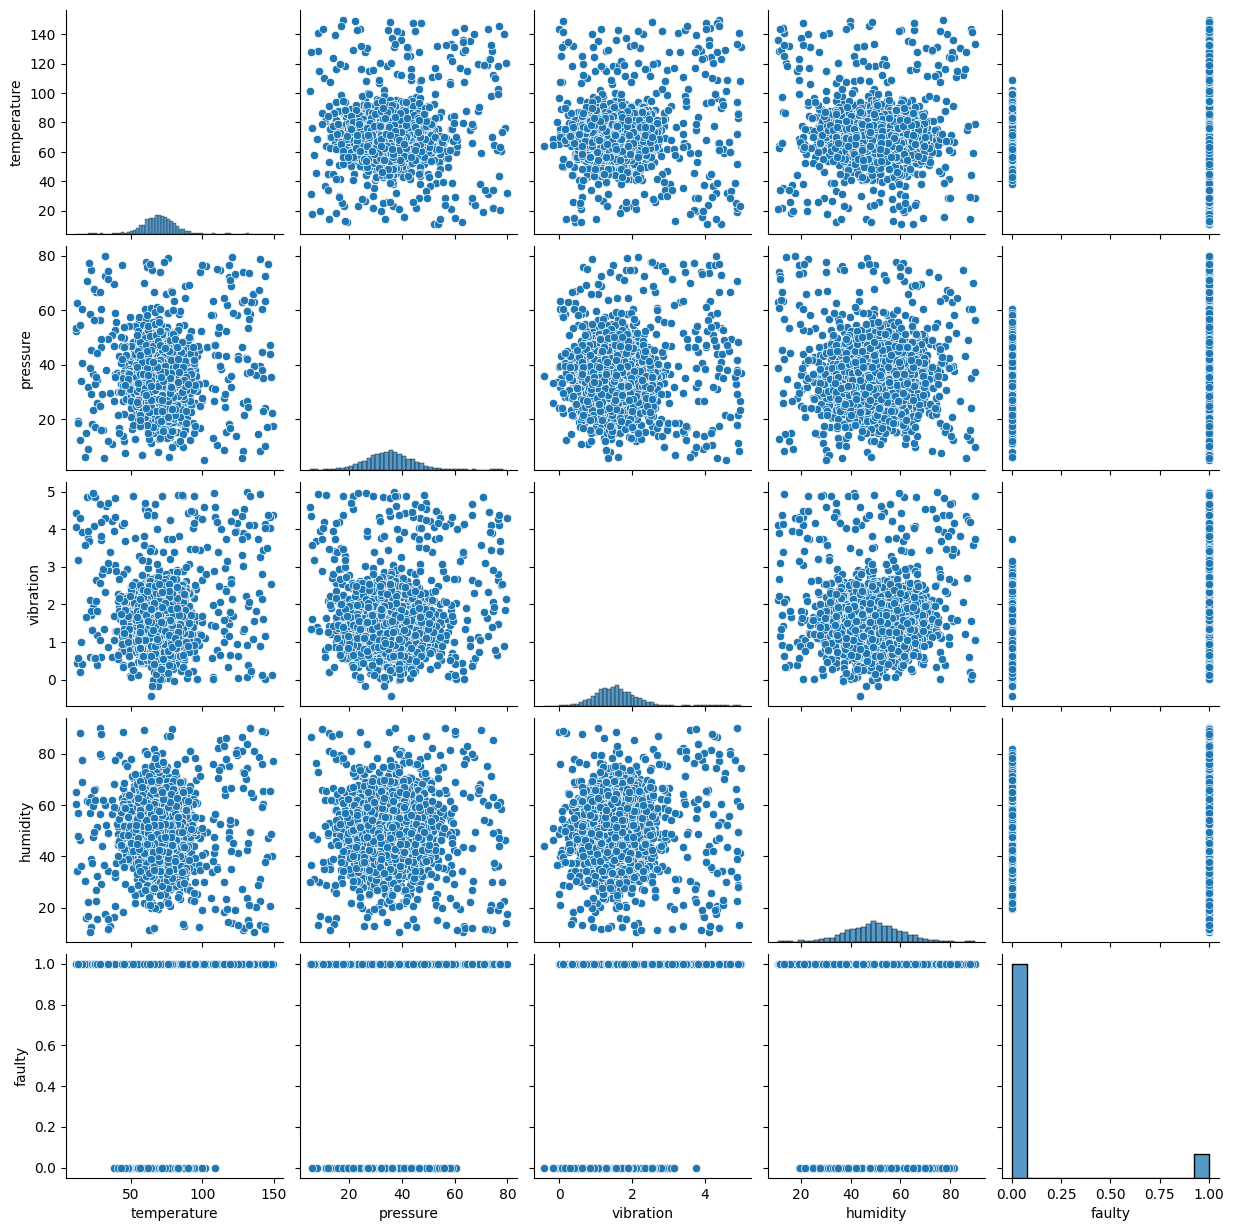

In [15]:
equipment_types = ['Compressor', 'Pump', 'Turbine']
for et in equipment_types:
    sns.pairplot(data[data['equipment'] == et])

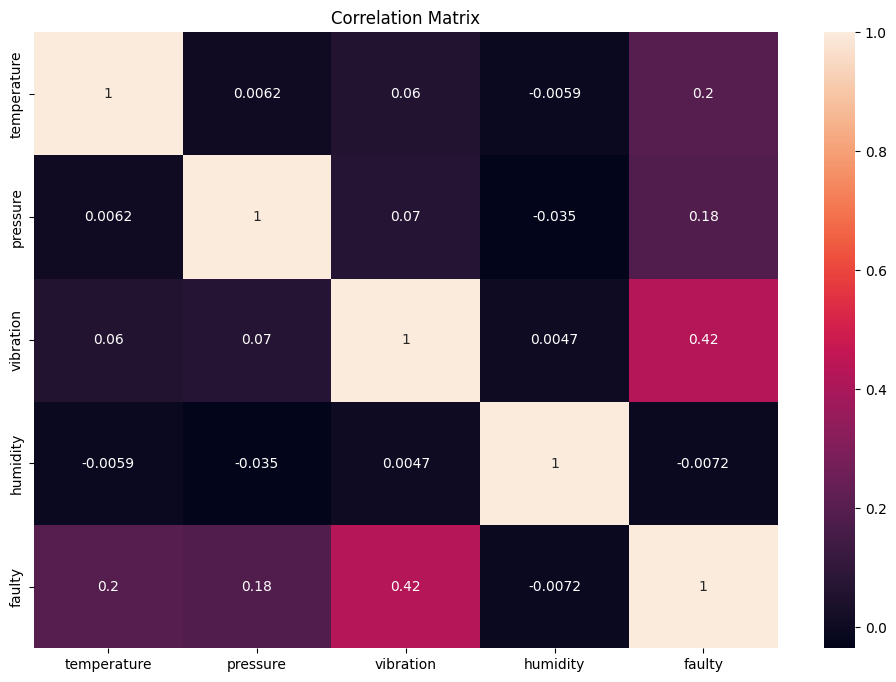

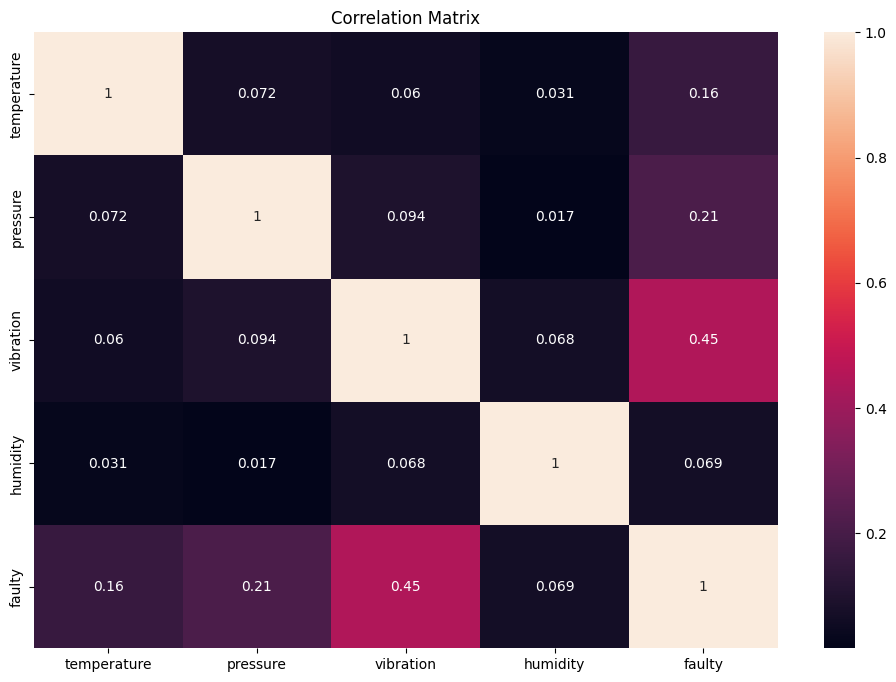

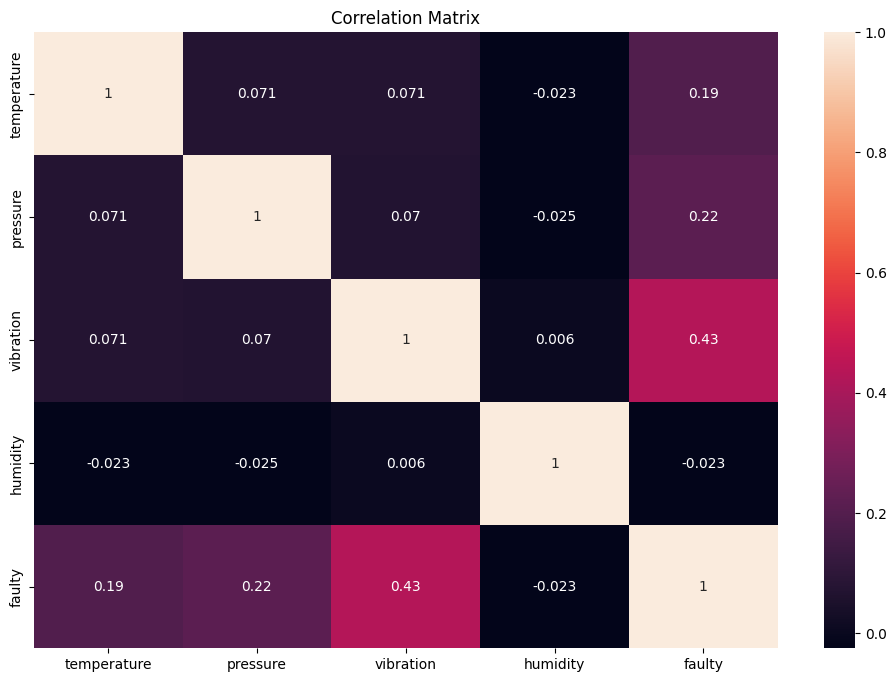

In [16]:
equipment_types = ['Compressor', 'Pump', 'Turbine']
for et in equipment_types:
    corr_matrix = data[data['equipment'] == et].select_dtypes(include=['int64', 'float64']).corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True)
    plt.title('Correlation Matrix')
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

def PreProcess(X):
    # Define the pipeline
    scaling_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

    num_features = X.select_dtypes(include=['int64','float64']).columns
    cat_features = X.select_dtypes(include=object).columns
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('label', OneHotEncoder())
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num',numeric_transformer, num_features),
            ('cat',categorical_transformer, cat_features)
        ]
    )
    return preprocessor.fit_transform(X)